# HW9
#### by: Christian Robles

In [1]:
import sa
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import pandas as pd

In [2]:
sa.load_stuff()

/home/crobles/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


# Problem 18

## Part A: Load in Data

In [3]:
df   = pd.read_csv('val_newest.csv',sep=',',header=None)
#df2             = pd.read_fwf('val_try.csv',header=None) 
val = df.to_numpy()
h    = val[:,0] # km
m    = val[:,1] # g/cm2
tau  = val[:,2] # unitless
T    = val[:,3] # K
V    = val[:,4] # km/s
nh   = val[:,5] # 1/cm3
ne   = val[:,6] # 1/cm3
ptot = val[:,7] # dyn/cm2
pgas = val[:,8] # fraction of ptot
sig  = val[:,9] # g/cm3

## Part B: Reproduce Rutten Fig. 8.8 Upper Plot

In [4]:
ion = sa.Phi(T,'H')
k = const.k_B.cgs.value

In [5]:
npp=(ion*nh)/(ne*k*T)

In [6]:
lognp = np.log10(npp)
logne = np.log10(ne)

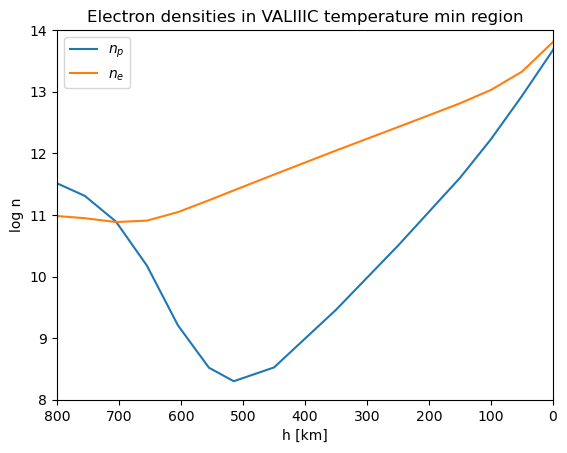

In [96]:
plt.plot(h,lognp,label=r"$n_p$")
plt.plot(h,logne,label=r"$n_e$")
plt.xlim([800,0])
plt.ylim([8,14])
plt.xlabel("h [km]")
plt.ylabel("log n")
plt.title("Electron densities in VALIIIC temperature min region")
plt.legend()
plt.savefig('hw9_1.svg', bbox_inches='tight')
plt.show()

## 800 km What T can reproduce?

In [8]:
# need values at 800
npp_800 = 10**11 # read from figure in the book
ne_800 = (ne[35]+ne[36])/2
nh_800 = (nh[35]+nh[36])/2
thing = npp_800*ne_800*k/nh_800
print(thing)

1.0037328556469708e-08


In [9]:
print(h)

[2543. 2298. 2290. 2280. 2274. 2271. 2267. 2263. 2255. 2230. 2200. 2160.
 2129. 2120. 2115. 2113. 2109. 2107. 2104. 2090. 2080. 2070. 2050. 2016.
 1990. 1925. 1785. 1605. 1515. 1380. 1280. 1180. 1065.  980.  905.  855.
  755.  705.  655.  605.  555.  515.  450.  350.  250.  150.  100.   50.
    0.  -25.  -50.  -75.]


In [10]:
print(h[36])

755.0


In [11]:
temps = np.linspace(4000,6000,num=1000)
steve = sa.Phi(temps,'H')/temps

In [12]:
things=np.ones(temps.size)*thing
zeros=np.zeros(temps.size)

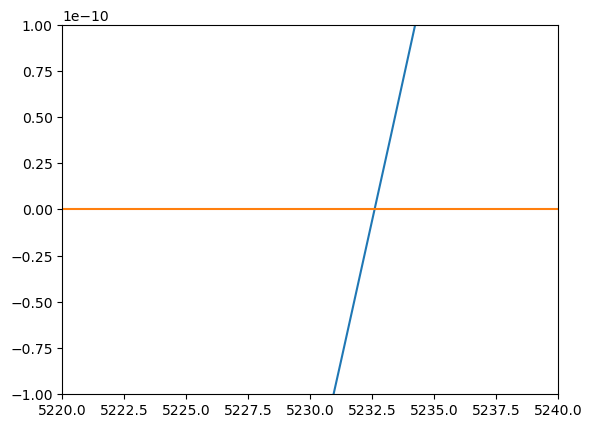

In [13]:
plt.plot(temps,steve-things)
plt.plot(temps,zeros)
tol = 10**(-10)
plt.ylim([-tol,tol])
plt.xlim([5220,5240])
plt.show()

### Crosses at ~5232.5 K

## Part C1: Find $P_e$ at every depth  

In [15]:
pg = ptot*pgas
pe = sa.Pe(pg,T)

In [16]:
print(np.log10(pe))
print(h)

[-1.14720878 -1.14461983 -1.15021854 -1.1623268  -1.17133811 -1.176806
 -1.18168199 -1.1855746  -1.18496245 -1.17536817 -1.16892199 -1.14837925
 -1.13611224 -1.13332034 -1.13544432 -1.14331431 -1.17887006 -1.20365084
 -1.22469303 -1.23051124 -1.22749429 -1.22377768 -1.21310499 -1.191432
 -1.17872881 -1.13806559 -1.08483818 -0.98425239 -0.92333568 -0.82329031
 -0.74094888 -0.66874157 -0.60801421 -0.59523107 -0.65857584 -0.69477957
 -0.95813391 -1.15739482 -1.32084166 -1.27101511 -1.13533805 -1.0141597
 -0.75964088 -0.30472466  0.14158577  0.5832988   0.8401741   1.19604041
  1.74795368  2.16914923  2.69230633  3.14569641]
[2543. 2298. 2290. 2280. 2274. 2271. 2267. 2263. 2255. 2230. 2200. 2160.
 2129. 2120. 2115. 2113. 2109. 2107. 2104. 2090. 2080. 2070. 2050. 2016.
 1990. 1925. 1785. 1605. 1515. 1380. 1280. 1180. 1065.  980.  905.  855.
  755.  705.  655.  605.  555.  515.  450.  350.  250.  150.  100.   50.
    0.  -25.  -50.  -75.]


## Part C2: Reproduce Rutten Fig. 8.8 Lower

In [17]:
# trying iron first
# ones=np.ones(T.size)
# ip = sa.Phi(T,"Fe")
# ip2 = sa.Phi(T,"Fe+")
# iron_frac = ones/(ones+(ones/ip)+(ip2/ones))
# iron_frac2 = ip2/(ones+(pe/ip)+(ip2/pe))

# first = ones/((ones/frac1)+ones+frac2)
# second = frac2/((ones/frac1)+ones+frac2)


In [18]:
def e_frac(spec,T,pe):
    ones=np.ones(T.size)
    #electrons per species per hydrogen
    if spec == 'H-':
        nextspec = 'H'
    elif spec == 'H':
        nextspec = 'HII'
    else:
        nextspec = spec + '+'
    p1 = sa.Phi(T,spec)
    p2 = sa.Phi(T,nextspec)
    first = ones/(ones+(pe/p1)+(p2/pe))
    second = (p2/pe)/(ones+(pe/p1)+(p2/pe))
    return first+2*second


In [19]:
npp2 = sa.Phi(T,'H')*nh/pe
n_e_fe = e_frac('Fe',T,pe)*nh*sa.A("Fe")
n_e_mg = e_frac('Mg',T,pe)*nh*sa.A('Mg')
n_e_si = e_frac('Si',T,pe)*nh*sa.A('Si')
n_e_tot = n_e_fe+n_e_mg+n_e_si+npp2

frac_fe = n_e_fe/n_e_tot
frac_mg = n_e_mg/n_e_tot
frac_si = n_e_si/n_e_tot
frac_h  = npp2/n_e_tot

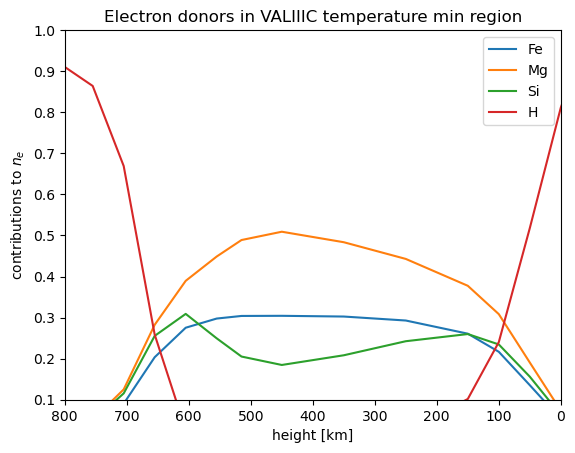

In [97]:
plt.plot(h,frac_fe,label="Fe")
plt.plot(h,frac_mg,label="Mg")
plt.plot(h,frac_si,label="Si")
plt.plot(h,frac_h,label="H")
plt.xlim([800,0])
plt.ylim([0.1,1])
plt.ylabel(r"contributions to $n_e$")
plt.xlabel("height [km]")
plt.legend()
plt.title("Electron donors in VALIIIC temperature min region")
#plt.yscale("log")
#plt.yticks([.2,.5,.6,.9,1])
#plt.ticklabel_format(style='plain') 
plt.savefig('hw9_2.svg', bbox_inches='tight')
plt.show()

## Problem 19: Opacity and Pressure

In [21]:
ideal_pe = (ne*k*T)
# pe is the one I calculated

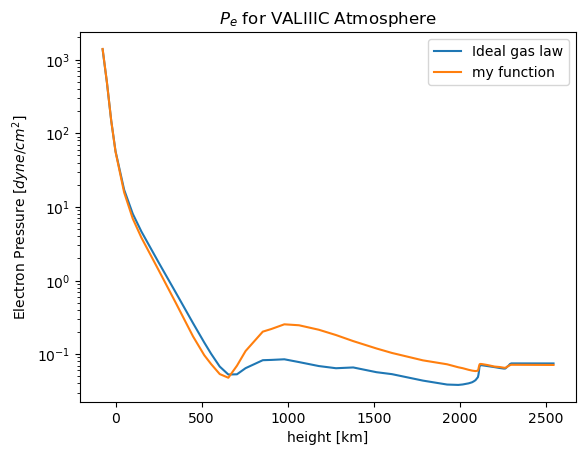

In [98]:
plt.plot(h,ideal_pe,label="Ideal gas law")
plt.plot(h,pe,label="my function")
plt.xlabel("height [km]")
plt.ylabel(r"Electron Pressure [$dyne/cm^2$]")
plt.title("$P_e$ for VALIIIC Atmosphere")
plt.yscale("log")
plt.legend()
plt.savefig('hw9_3.svg', bbox_inches='tight')
plt.show()

In [23]:
Temp1=np.array([6420.])
wavelength1=np.array([5000.])
Pe1=np.array([57.])
Pg1=np.array([1.13*10**(5)])

In [24]:
testing=sa.k_nu(wavelength1,Temp1,Pe1,Pg1)

[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]
simulated emission factor is:[0.98869168]
H neutral fraction is:[0.99959344]
The total sum of abundances in g:2.2701368728240465e-24
knbf no fluff[1.43928452e-24]
knbf:[0.6265834]
knff:[0.03751368]
kbf:[0.00808933]
kff:[0.00027785]
k_e:[0.00016064]


In [25]:
print(testing)

[0.67262489]


In [26]:
Temp2=np.array([11572.])
wavelength2=np.array([15000.])
Pe2=np.array([10**(2.76)])
Pg2=np.array([1259.])
Pe3=sa.Pe(Pg2,Temp2)
print(np.log10(Pe2))

[2.76]


In [41]:
opacity2=sa.k_nu(wavelength2,Temp2,Pe3,Pg2)

[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]
simulated emission factor is:[0.56346749]
H neutral fraction is:[0.09122345]
The total sum of abundances in g:2.2701368728240465e-24
knbf no fluff[4.21428478e-25]
knbf:[0.00954217]
knff:[0.15242308]
kbf:[31.42582917]
kff:[43.00460879]
k_e:[0.26660581]


In [42]:
print(opacity2)

[74.85900902]


In [29]:
thing=sa.alpha_H_neg_bf(np.array([5000.]))

[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]


In [30]:
print(thing)

[28.45924081]


[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]
[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]


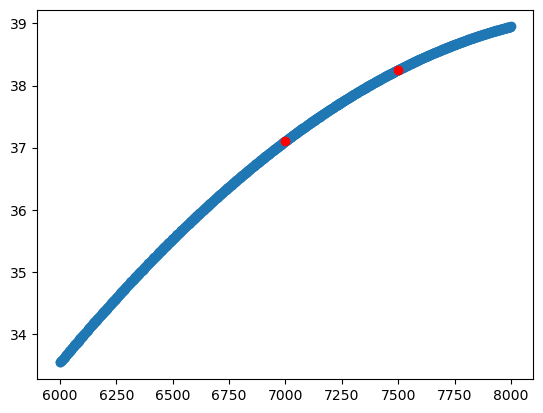

In [31]:
test_w=np.array([7000.,7500.])
#test2=np.linspace(6500,7500,num=3)
wtf=sa.alpha_H_neg_bf(test_w)
wal = np.linspace(6000,8000,num=1000)
al = sa.alpha_H_neg_bf(wal)
plt.scatter(wal,al)
plt.plot(test_w,wtf,'ro')
plt.show()

## Wishart H neg bf absorbtion coefficient comparison

In [32]:
# wishart data
w_wl = np.linspace(1500,16000,num=30)
w_ab = np.array([6.512,9.453,12.75,16.19,19.65,23.02,26.24,29.23,31.94,34.32,36.32,37.91,39.07,39.77,40.01,39.77,39.06,37.89,36.24,34.19,31.72,28.87,25.71,22.26,18.62,14.85,11.07,7.407,4.052,1.302])

In [33]:
w_w = np.linspace(1500,16000,num=3000)
model = sa.alpha_H_neg_bf(w_w)

[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]


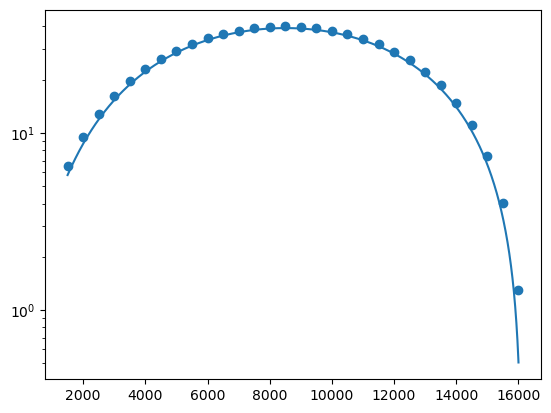

In [34]:
plt.scatter(w_wl,w_ab)
plt.plot(w_w,model)
plt.yscale("log")
plt.show()

In [35]:
model2 = sa.alpha_H_neg_bf(w_wl)

[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]


In [36]:
z = np.polyfit(w_wl, w_ab, 6)
p = np.poly1d(z)
print(z)

[ 2.36441847e-23 -1.17096614e-18  2.77009154e-14 -3.91601645e-10
  2.37830228e-06  6.77667207e-04  1.33056292e+00]


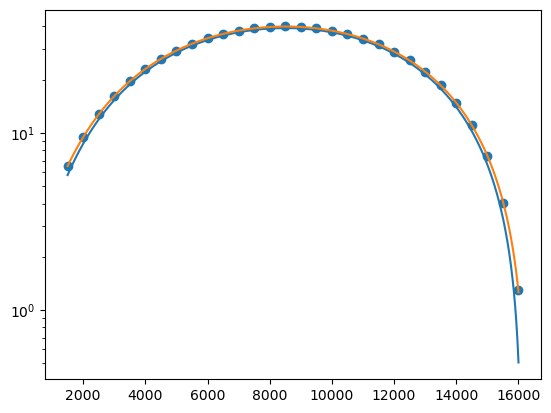

In [37]:
plt.scatter(w_wl,w_ab)
plt.plot(w_w,model)
plt.plot(w_w,p(w_w))
plt.yscale("log")
plt.show()

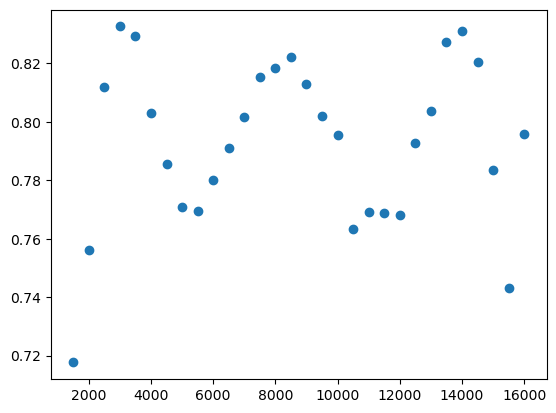

In [38]:
plt.scatter(w_wl,w_ab-model2)
plt.show()

## 19d

In [46]:
print(tau)
pg = ptot*pgas
pe = sa.Pe(pg,T)
wave_500=np.array([5000.])

[0.00e+00 3.71e-08 3.97e-08 4.49e-08 4.95e-08 5.23e-08 5.66e-08 6.12e-08
 7.11e-08 1.03e-07 1.43e-07 1.98e-07 2.43e-07 2.56e-07 2.64e-07 2.67e-07
 2.75e-07 2.80e-07 2.88e-07 3.24e-07 3.51e-07 3.77e-07 4.30e-07 5.20e-07
 5.90e-07 7.72e-07 1.21e-06 1.96e-06 2.42e-06 3.29e-06 4.08e-06 5.08e-06
 6.86e-06 9.15e-06 1.24e-05 1.55e-05 2.54e-05 3.29e-05 4.45e-05 7.02e-05
 1.46e-04 3.01e-04 1.02e-03 5.63e-03 2.67e-02 1.12e-01 2.20e-01 4.40e-01
 9.95e-01 1.68e+00 3.34e+00 7.45e+00]


In [47]:
opacity_500=sa.k_nu(wave_500,T,pe,pg)

[ 1.199654e-01 -1.182670e-06  2.642430e-07 -4.405240e-11  3.239920e-15
 -1.395680e-19  2.787010e-24]
simulated emission factor is:[0.06234712 0.18460604 0.27599795 0.43758574 0.54054998 0.59312313
 0.64217391 0.67647015 0.69103388 0.6954999  0.6985023  0.70609638
 0.71381677 0.72166386 0.74596357 0.78890568 0.90362403 0.93207356
 0.9516377  0.9669409  0.97033619 0.97332851 0.97663779 0.97995468
 0.98202854 0.9841783  0.98696668 0.98853317 0.98908261 0.98976701
 0.99020946 0.99071167 0.99147038 0.99222374 0.99326302 0.99386084
 0.99570356 0.99672305 0.99772024 0.99851207 0.99888934 0.9989929
 0.9989071  0.99841117 0.99757045 0.99613263 0.9948827  0.99275445
 0.98869168 0.98446057 0.97720737 0.96852726]
H neutral fraction is:[1.56860192e-13 1.38654566e-12 3.56183846e-12 2.09023200e-11
 8.76869110e-11 2.09216723e-10 5.25559472e-10 1.07876522e-09
 1.50477269e-09 1.70793640e-09 1.86119935e-09 2.34271934e-09
 2.91515517e-09 3.57783193e-09 6.81143843e-09 2.45276501e-08
 4.44382600e-06 4.04063

In [48]:
print(opacity_500)

[3.18317223e-01 3.18341981e-01 3.18348954e-01 3.18367494e-01
 3.18395551e-01 3.18420321e-01 3.19313653e-01 3.19319309e-01
 3.19325109e-01 3.19331237e-01 3.19335694e-01 3.19350380e-01
 3.19363186e-01 3.19372470e-01 3.19402211e-01 3.19487478e-01
 3.19567298e-01 3.06176773e-01 2.97820547e-01 2.98626133e-01
 2.98477749e-01 2.97509387e-01 2.93837408e-01 2.81593872e-01
 2.62673876e-01 2.21171081e-01 1.27942651e-01 6.56594741e-02
 4.72545463e-02 2.94153134e-02 2.11719649e-02 1.53891162e-02
 1.06605892e-02 8.15675295e-03 5.96433779e-03 5.17045760e-03
 3.06009806e-03 2.24515015e-03 1.94161792e-03 2.88631210e-03
 4.77522926e-03 6.72083775e-03 1.14226381e-02 2.52828034e-02
 5.25552347e-02 1.03789399e-01 1.52032262e-01 2.63927588e-01
 6.60613265e-01 1.35058963e+00 3.36010042e+00 7.76278745e+00]


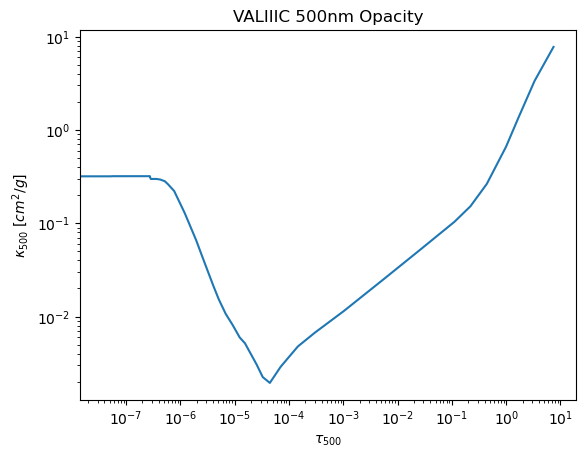

In [99]:
plt.plot(tau,opacity_500)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$\tau_{500}$')
plt.ylabel(r'$\kappa_{500}$ [$cm^2/g$]')
plt.title("VALIIIC 500nm Opacity")
plt.savefig('hw9_4.svg', bbox_inches='tight')
plt.show()

## 4e check with hydrostatic eq

In [57]:
g=np.power(10,4.4377)
print(g)

27396.81013531025


In [58]:
dP = np.diff(ptot)
dtau = np.diff(tau)
eq_kap = g*dtau/dP

In [62]:
print(tau.size)
print(eq_kap.size)

52
51


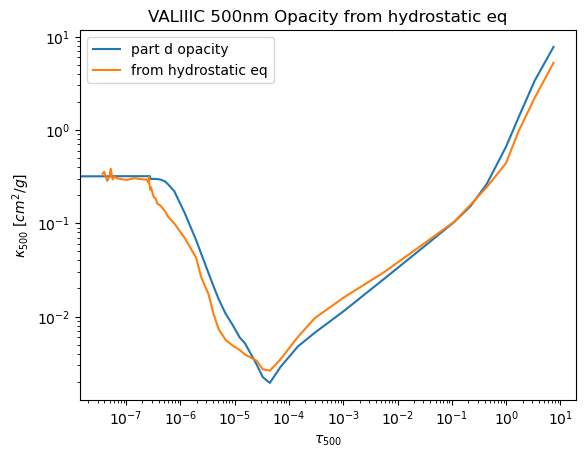

In [100]:
plt.plot(tau,opacity_500,label="part d opacity")
plt.plot(tau[1:],eq_kap,label="from hydrostatic eq")
plt.title("VALIIIC 500nm Opacity from hydrostatic eq")
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r'$\tau_{500}$')
plt.ylabel(r'$\kappa_{500}$ [$cm^2/g$]')
plt.legend()
plt.savefig('hw9_5.svg', bbox_inches='tight')
plt.show()